In [1]:
import sys
sys.path.insert(0, "/home/bernd/git/pink/build/lib")
sys.path.insert(0, "/home/bernd/git/pink/scripts")

import pink
import tools
import numpy as np

print(pink.__version__)

2.4.1 revision 98a9d1a


In [2]:
import math

som_dim = 2
image_dim = 4
neuron_dim = 4
euclid_dim = 4

In [3]:
images = np.zeros((1,image_dim,image_dim)).astype(np.float32)

for i in range(image_dim):
    images[0,i,i] = 1

print('shape:     ', images.shape)
print('min value: ', np.amin(images))
print('max value: ', np.amax(images))

shape:      (1, 4, 4)
min value:  0.0
max value:  1.0


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


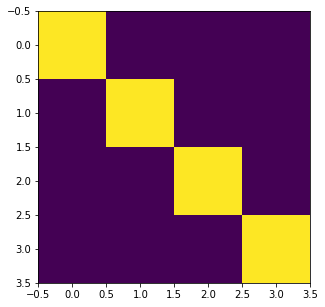

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

print(images[0])

plt.figure(figsize=(5,5))
plt.imshow(images[0,:,:])

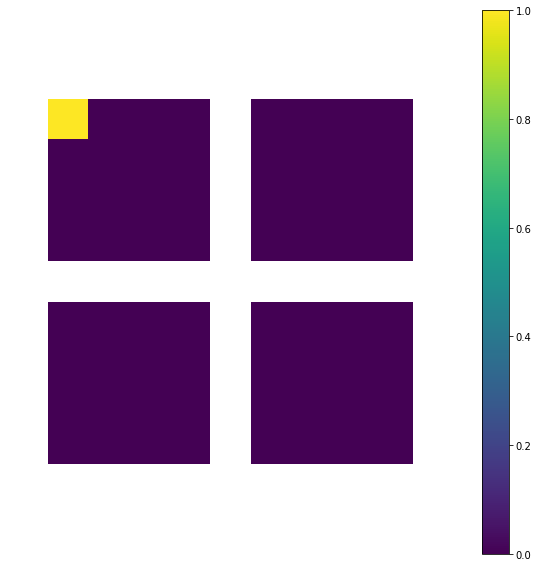

In [5]:
#np_som = np.random.rand(som_dim, som_dim, neuron_dim, neuron_dim, number_of_channnels).astype(np.float32)
np_som = np.zeros((som_dim, som_dim, neuron_dim, neuron_dim)).astype(np.float32)
np_som[0,0,0,0] = 1
som = pink.SOM(np_som, neuron_layout="cartesian-2d")
image = tools.show(som, border=1)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(image)
plt.colorbar()

In [6]:
mapper = pink.Mapper(som,
                     number_of_rotations=4,
                     use_flip=False,
                     euclidean_distance_dim=euclid_dim,
                     euclidean_distance_shape=pink.EuclideanDistanceShape.CIRCULAR,
                     use_gpu=False,
                     verbosity=1)

In [7]:
res = mapper(pink.Data(images[0], layout="cartesian-2d"))

In [8]:
print(res)

([1.7320507764816284, 2.0, 2.0, 2.0], [2, 1, 0, 3])
